# Filtrado de las señales EEG
Presentan un error en el filtrado

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [31]:
r = open("D5.txt","r")
raw_data = r.readlines()[2]
r.close()
print(raw_data)

%Sample Rate = 250 Hz



In [32]:
## Regex para extraer la frecuencia
x = re.findall("[0-9][0-9]\d", raw_data)[0]
# print(x)

Fs = float(x)
Ts=1/Fs                     # Determinar el periodo de muestreo

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=250.0 hz
 Ts=0.004 s


## Lectura del archivo

In [33]:
a_r = np.genfromtxt("D5.txt", delimiter=",",skip_header = 5)
a_r = np.transpose(a_r[:,1:9])
print(a_r[7])
print(a_r.shape)

[6533.01257289 6470.78531632 6495.43929046 ... 6755.54654068 6646.31356553
 6617.03278029]
(8, 3709)


## Ploteo de la señal

In [34]:
import scipy.signal as signal

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

In [35]:
s_factor = 0.02235 # Scaling factor
a_r = a_r * s_factor
t = np.zeros(a_r.shape)
y_filt = np.zeros(a_r.shape)
for i in range(a_r.shape[0]):
    #y_filt[i] = a_r[i]
    y_filt[i] = bandpass_filter(a_r[i], 0.8, 48, Fs)
    t[i] = np.arange(0, len(a_r[i]))*Ts 

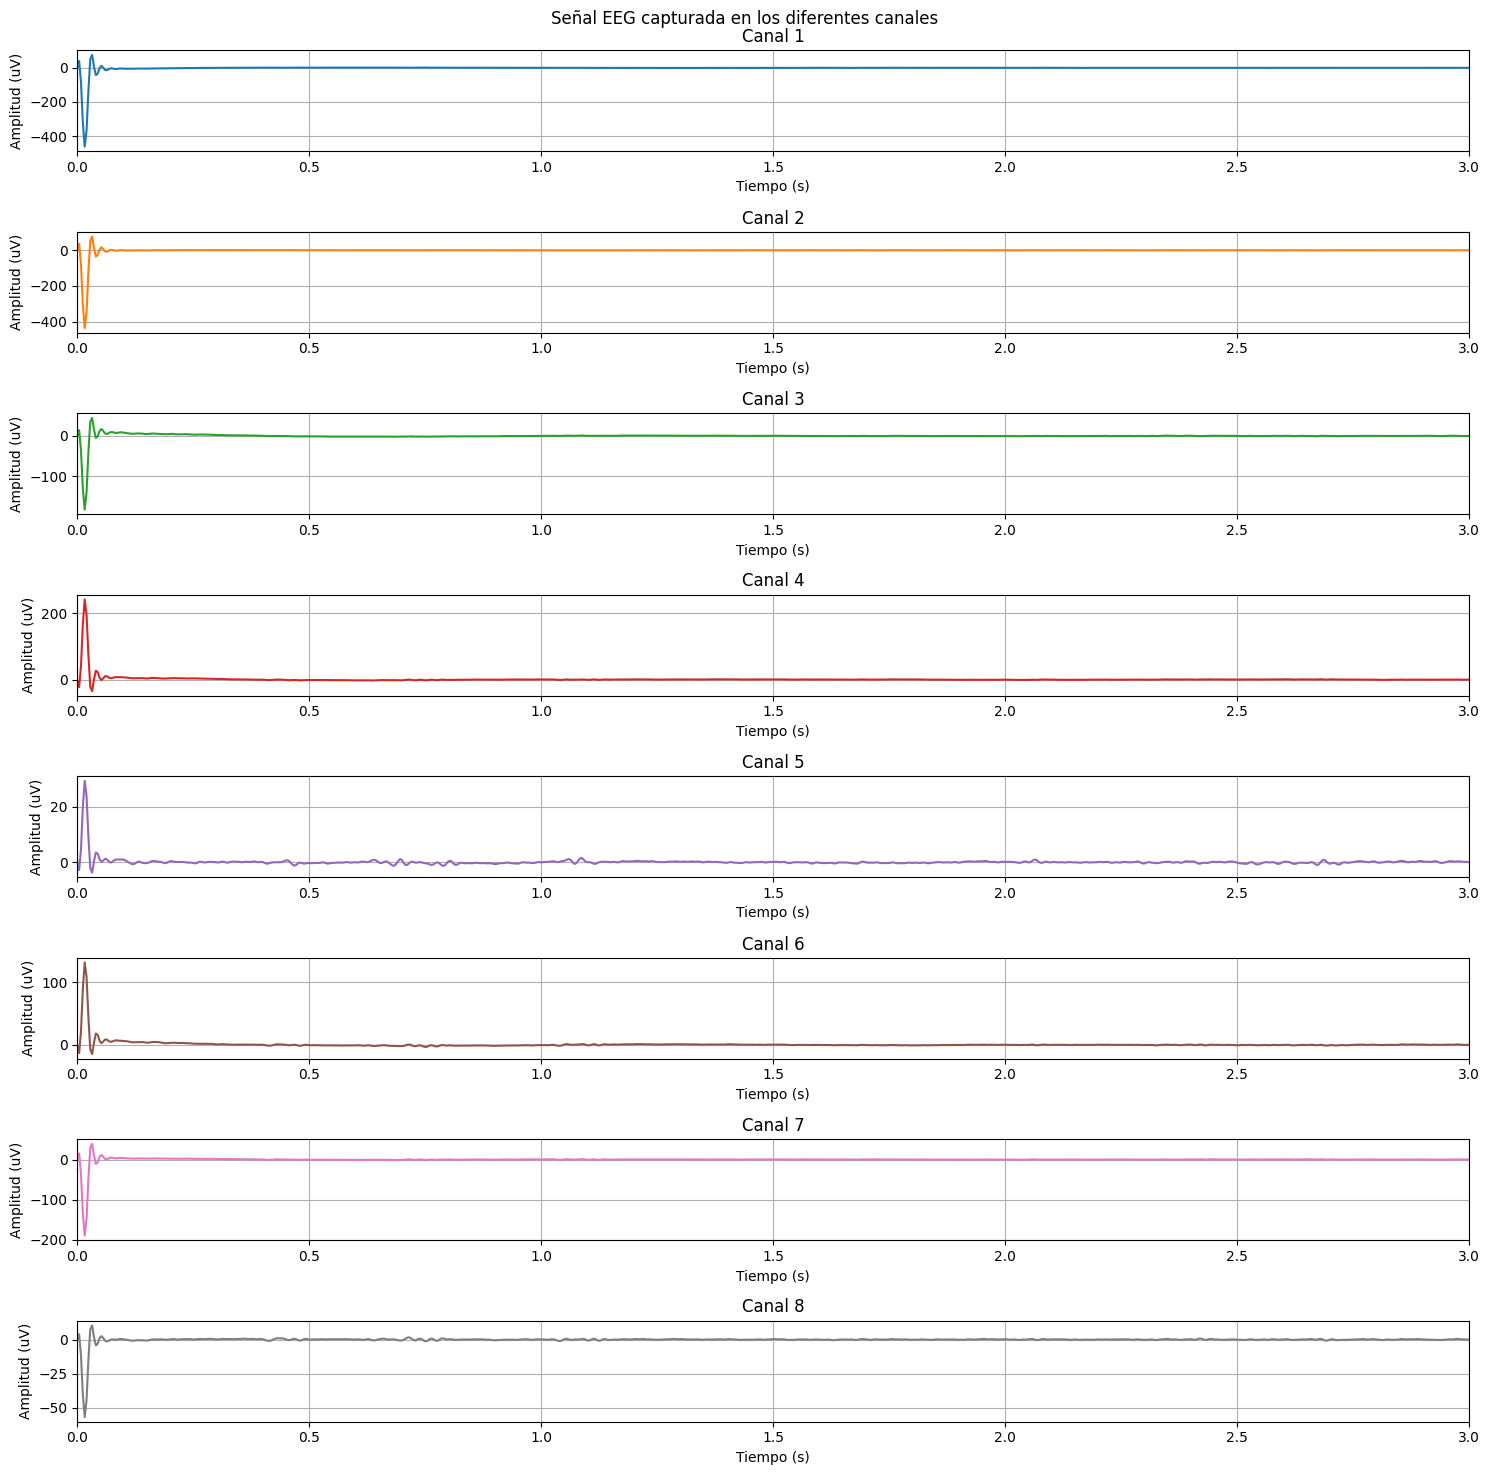

In [39]:
fig2 = plt.figure(figsize=(15,15))

colors = [
    "#1f77b4",  # Azul medio
    "#ff7f0e",  # Naranja
    "#2ca02c",  # Verde
    "#d62728",  # Rojo
    "#9467bd",  # Morado
    "#8c564b",  # Marrón
    "#e377c2",  # Rosa
    "#7f7f7f"   #
]
limits = {"Todo": [0,3],"Reposo": [72, 102], "Parpadeo":[120,170], "Reposo2": [185,215], "Esfuerzo mental": [260, 320]}
n = 8
fig2.suptitle('Señal EEG capturada en los diferentes canales')
lim = limits["Todo"]# Escoger sección para graficar
for i in range(n):
    plt.subplot(n, 1, i + 1); plt.plot(t[i], y_filt[i], color=colors[i]); plt.xlabel("Tiempo (s)")
    plt.title(f"Canal {i + 1}");plt.grid();plt.xlim(lim)# Seleccionar sección
    plt.ylabel("Amplitud (uV)")
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
plt.savefig('EEG_.png', transparent=False, )
plt.show()